In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Make plots larger and clearer
plt.rcParams['figure.figsize'] = [15, 5]

# Read the image
img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)

In [2]:
def simple_convolution(image, kernel):
    # Get dimensions
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    
    # Calculate output dimensions (will be smaller than input)
    out_height = img_height - k_height + 1
    out_width = img_width - k_width + 1
    
    # Create output array
    output = np.zeros((out_height, out_width), dtype=np.float32)
    
    # Apply convolution
    for i in range(out_height):
        for j in range(out_width):
            output[i, j] = np.sum(
                image[i:i+k_height, j:j+k_width] * kernel
            )
    
    return output

def max_pooling(image, pool_size=2):
    # Get dimensions
    height, width = image.shape
    
    # Calculate output dimensions
    out_height = height // pool_size
    out_width = width // pool_size
    
    # Create output array
    output = np.zeros((out_height, out_width), dtype=np.float32)
    
    # Apply max pooling
    for i in range(out_height):
        for j in range(out_width):
            output[i, j] = np.max(
                image[i*pool_size:(i+1)*pool_size, 
                      j*pool_size:(j+1)*pool_size]
            )
    
    return output

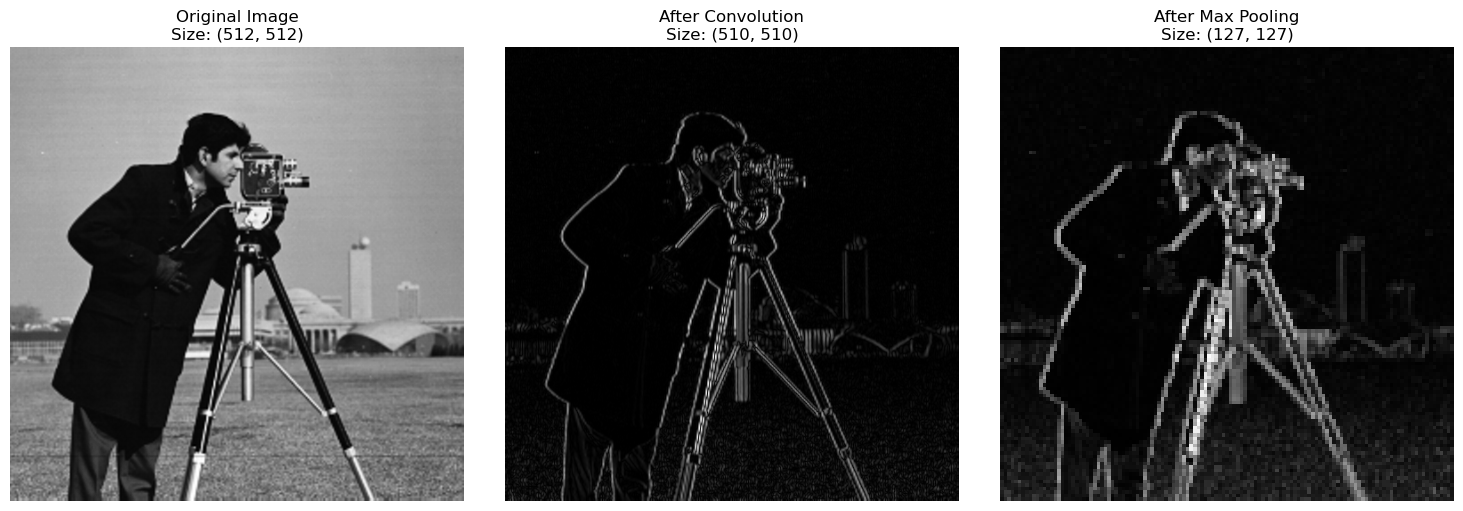

In [3]:
# Define edge detection filter (Sobel)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 1. Apply convolution
conv_output = simple_convolution(img, sobel_x)

# Normalize convolution output for visualization
conv_output = np.abs(conv_output)
conv_output = (conv_output - conv_output.min()) / (conv_output.max() - conv_output.min()) * 255

# 2. Apply max pooling to the convolution output
pooled_output = max_pooling(conv_output, pool_size=4)

# Plot results
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title(f'Original Image\nSize: {img.shape}')
plt.axis('off')

plt.subplot(132)
plt.imshow(conv_output, cmap='gray')
plt.title(f'After Convolution\nSize: {conv_output.shape}')
plt.axis('off')

plt.subplot(133)
plt.imshow(pooled_output, cmap='gray')
plt.title(f'After Max Pooling\nSize: {pooled_output.shape}')
plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Print size changes
print(f"Original image size: {img.shape}")
print(f"After convolution: {conv_output.shape}")
print(f"After max pooling: {pooled_output.shape}")

Original image size: (512, 512)
After convolution: (510, 510)
After max pooling: (127, 127)
